# Some simple examples of digital image processing
Code by [karbon](https://github.com/csy-tvgo).

[Click here for more examples.](https://github.com/CSY-tvgo/Digital-Image-Processing-Tutorial)

In [1]:
# import packages
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

## 0. Read image from file
### 0.1 Color image
Using `cv2.imread(filepath, flag = cv2.IMREAD_COLOR)` to read image from file.

Default value of `flag` is `cv2.IMREAD_COLOR`. If you want to read a color image, you can leave this parameter empty.

More details of `flag` in [this page](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga61d9b0126a3e57d9277ac48327799c80). 

In [2]:
#bridgeRaw = cv2.imread("./images/NanjingShizhangJiangdaqiao.jpg")
bridgeRaw = cv2.imread('C:\\Users\\admin\\Chapter8\\NanjingShizhangJiangdaqiao.jpg')

The image stores using `numpy.ndarray`.

In [3]:
print(type(bridgeRaw))

<class 'numpy.ndarray'>


The resolution of this image is $506*675$. 

506px in height, 675px in width, 3 channels in color space.

In [4]:
print(bridgeRaw.shape)

(506, 675, 3)


Using `plt.imshow(X)` to show this image with matplotlib.

**Attention: OpenCV reads images in BGR order, while `plt.imshow` accepts images in RGB order as input.**

So, you need to use `cv2.cvtColor(img, flag)` to convert the color order of input.

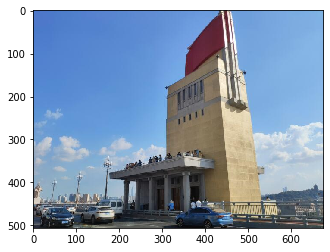

In [5]:
plt.imshow(cv2.cvtColor(bridgeRaw, cv2.COLOR_BGR2RGB))

### 0.2 Grayscale image
Using `cv2.imread(filepath, flags = cv2.IMREAD_GRAYSCALE)`.

In [6]:
jokerRaw = cv2.imread('C:\\Users\\admin\\Chapter8\\joker.bmp', cv2.IMREAD_GRAYSCALE)

The resolution of this image is $200*320$.

200px in height, 320px in width, 1 channel (grayscale) in color space.

In [7]:
print(jokerRaw.shape)

(200, 320)


Using `plt.imshow(X)` to show this image with matplotlib.

Same as before, you need to use `cv2.cvtColor(img, flag)` to convert the color order of input.

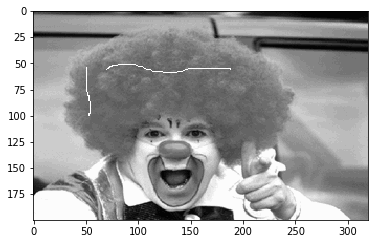

In [8]:
plt.imshow(cv2.cvtColor(jokerRaw, cv2.COLOR_GRAY2RGB))

## 1. Slicing

You can slice the image just like slicing a numpy array.

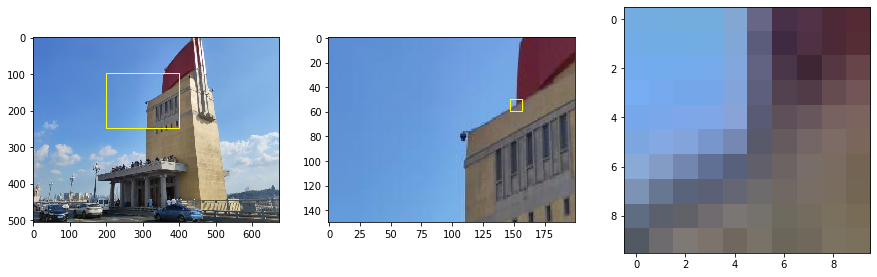

In [10]:
fig1 = bridgeRaw # This line is a WRONG operation. 
# If you directly assign an image to a new variable like above, you will unable to modify them seperately.
# You should create a copy and assign it to fig1 variable, like the following line.
fig1 = bridgeRaw.copy() 

# Slicing fig1 and assign the sliced part to fig2.
fig2 = fig1[100:250, 200:400, :]  
# Slicing fig2 and assign the sliced part to fig3.
fig3 = fig2[50:60, 147:157, :] 

# Draw yellow rectangles in copies of fig1 and fig2 to show the part you sliced.
fig1 = cv2.rectangle(fig1.copy(),(200,100),(400,250), color=(0,255,255),thickness = 2)     #通过对角线点坐标画矩形
fig2 = cv2.rectangle(fig2.copy(),(147,50),(157,60), color=(0,255,255),thickness = 1)

# Show the images.
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(fig1, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(fig2, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(fig3, cv2.COLOR_BGR2RGB))

## 2. Print the matrix of image

The fig3 above is an $10*10$ color image. It is stored as an $10*10*3$ matrix.

In [11]:
print(fig3.shape)

print("\n Blue channel:")
print(fig3[:, :, 0])
print("\n Green channel:")
print(fig3[:, :, 1])
print("\n Red channel:")
print(fig3[:, :, 2])

(10, 10, 3)

 Blue channel:
[[225 223 221 221 211 134  72  71  55  52]
 [230 228 228 227 214 123  65  67  55  53]
 [238 236 236 235 220 130  73  52  65  72]
 [243 238 233 233 218 125  79  71  80  85]
 [234 234 233 231 214 116  89  92  97  94]
 [224 226 218 204 178 107  94 101 101  91]
 [215 197 174 148 124 106  98 103  97  84]
 [179 145 122 116 115 108  99 101  95  83]
 [130 108 103 111 115 109  95  95  94  86]
 [ 99 110 117 108  94 104  90  91  97  92]]

 Green channel:
[[172 173 173 173 167 102  48  50  41  42]
 [172 172 172 172 167  92  42  49  41  45]
 [171 172 171 171 167  99  54  38  55  68]
 [173 170 167 166 164  95  66  59  76  85]
 [167 167 167 166 163  91  80  86  98 100]
 [166 168 164 150 136  89  90 102 108 102]
 [170 156 134 112  97  95 100 109 108 100]
 [147 119 100  96 102 107 105 110 109 102]
 [109  96  98 107 118 114 106 108 113 108]
 [ 89 107 121 115 103 114 102 104 114 112]]

 Red channel:
[[115 115 115 115 130 103  72  82  77  85]
 [113 113 113 115 129  91  64  78  

## 3. Binary image
Binarizing an image is very simple. 

Just set a threshold. Then set values bigger than threshold to 1, and set values smaller than threshold to 0.


In [15]:
# import image
garbageRaw = cv2.imread("C:\\Users\\admin\\Chapter8\\garbageExample.jpg")
# create a grayscale copy
garGray0 = cv2.cvtColor(garbageRaw.copy(), cv2.COLOR_BGR2GRAY)
# set threshold
threshold = 127

In [24]:
# Common loop
garGray1 = cv2.cvtColor(garbageRaw.copy(), cv2.COLOR_BGR2GRAY)
height = garGray1.shape[0]
print(garGray1)                           # garGray1 是一个矩阵 代表一个图片
print(garGray1.shape)
width = garGray1.shape[1]
for r in range(0, height):
    for c in range(0, width):
        if garGray1[r][c] > threshold:
            garGray1[r][c] = 255
        else:
            garGray1[r][c] = 0  
print(garGray1)

[[194 194 194 ... 160 159 159]
 [194 194 194 ... 160 161 161]
 [194 194 194 ... 160 157 157]
 ...
 [186 186 186 ... 140 143 143]
 [186 186 186 ... 140 139 138]
 [187 187 187 ... 139 142 140]]
(881, 1578)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [17]:
# Vectorization: A faster method
garGray2 = cv2.cvtColor(garbageRaw.copy(), cv2.COLOR_BGR2GRAY)
garGray2[garGray2>threshold] = 255
garGray2[garGray2<=threshold] = 0

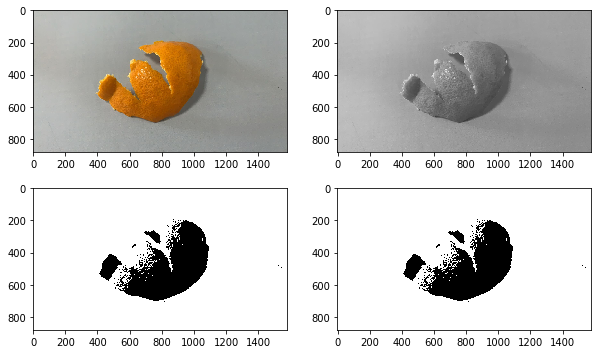

In [32]:
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)                                             # plt.subplot(行，一行几个，第几个)
plt.imshow(cv2.cvtColor(garbageRaw, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(garGray0, cv2.COLOR_GRAY2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(garGray1, cv2.COLOR_GRAY2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(garGray2, cv2.COLOR_GRAY2RGB))

## 4. Edge detection
One implementation of edge detection is through convolution.

Convolution is a mathematical operation. The following is an example of convolution in 2D image.

Here're matrix 
$ A=\left[
   \begin{matrix}
   3 & 3 & 2 & 1 & 0 \\
   0 & 0 & 1 & 3 & 1 \\
   3 & 1 & 2 & 2 & 3 \\
   2 & 0 & 0 & 2 & 2 \\
   2 & 0 & 0 & 0 & 1
  \end{matrix}
  \right]$
  and matrix 
$ B=\left[
   \begin{matrix}
   0 & 1 & 2 \\
   2 & 2 & 0 \\
   0 & 1 & 2 
  \end{matrix}
  \right]$.
  
 Convolution $A*B$ can be described as the following gif image.
 ![conv2d](./images/conv2d.gif)
 That is, $A*B=\left[
   \begin{matrix}
   12 & 12 & 17 \\
   10 & 17 & 19 \\
   9 & 6 & 14 
  \end{matrix}
  \right]$.
  
 Then, we use the image of Jiangdaqiao to demonstrate edge detection.

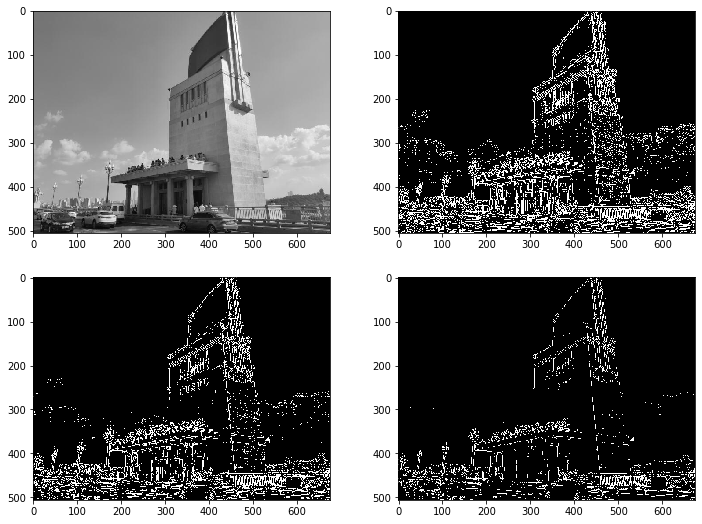

In [20]:
raw = cv2.imread("C:\\Users\\admin\\Chapter8\\NanjingShizhangJiangdaqiao.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)

# Laplace Operator
laplace = np.array(
    [[0, -1, 0],
     [-1, 4, -1],
     [0, -1, 0]]
)
# convolution
aft1 = cv2.filter2D(gray, -1, laplace)
aft2 = cv2.filter2D(gray, -1, laplace)
aft3 = cv2.filter2D(gray, -1, laplace)

# binarize, different thresholds can get different results
def binarize(img, threshold):
    b = img.copy()
    b[b>threshold] = 255
    b[b<=threshold] = 0
    return b

aft1 = binarize(aft1, 5)
aft2 = binarize(aft2, 10)
aft3 = binarize(aft3, 25)

plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(aft1, cv2.COLOR_GRAY2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(aft2, cv2.COLOR_GRAY2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(aft3, cv2.COLOR_GRAY2RGB))

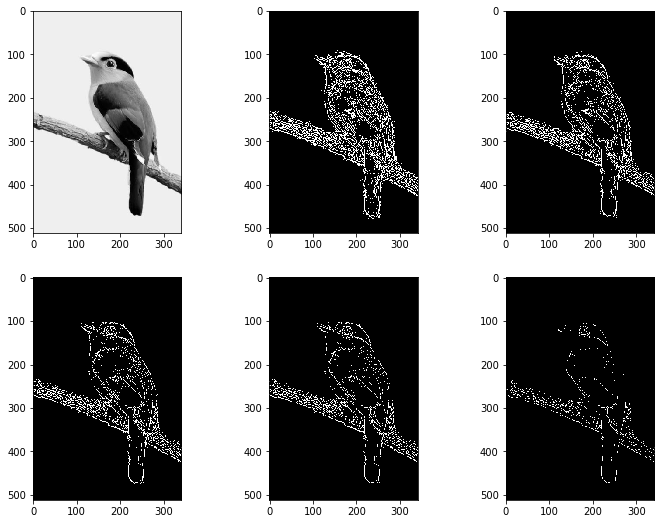

In [52]:
raw = cv2.imread('C:\\Users\\admin\\Chapter8\\bird.jpg')
gray = cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
laplace = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]]
                  )
aft1 = cv2.filter2D(gray, -1, laplace)
aft2 = cv2.filter2D(gray, -1, laplace)
aft3 = cv2.filter2D(gray, -1, laplace)
aft4 = cv2.filter2D(gray, -1, laplace)
aft5 = cv2.filter2D(gray, -1, laplace)

def binar(img,threshold):
    cpy = img.copy()
    cpy[cpy > threshold] = 255
    cpy[cpy <= threshold] = 0
    return cpy
aft1 = binar(aft1,5)
aft2 = binar(aft2,10)
aft3 = binar(aft3,15)
aft4 = binar(aft4,20)
aft5 = binar(aft5,40)

plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))
plt.subplot(2,3,2)
plt.imshow(cv2.cvtColor(aft1,cv2.COLOR_GRAY2RGB))
plt.subplot(2,3,3)
plt.imshow(cv2.cvtColor(aft2,cv2.COLOR_GRAY2RGB))
plt.subplot(2,3,4)
plt.imshow(cv2.cvtColor(aft3,cv2.COLOR_GRAY2RGB))
plt.subplot(2,3,5)
plt.imshow(cv2.cvtColor(aft4,cv2.COLOR_GRAY2RGB))
plt.subplot(2,3,6)
plt.imshow(cv2.cvtColor(aft5,cv2.COLOR_GRAY2RGB))